In [298]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

In [3]:
data = pd.read_csv('Spotify Dataset/data.csv')

In [4]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [77]:
data['key'].value_counts()

0     21600
7     20803
2     18823
9     17571
5     16430
4     12933
1     12886
10    12148
8     10751
11    10670
6      8741
3      7297
Name: key, dtype: int64

In [6]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [7]:
data.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


In [8]:
data['duration_m'] = data['duration_ms']/60000

In [9]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_m
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,13.861117
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,3.008883
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,8.334367
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,3.500000
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,2.778217


In [10]:
data.drop('duration_ms', axis=1, inplace=True)
data.drop('release_date', axis=1, inplace=True)
data.tail()

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,0.0881,105.029,5.028567
170649,0.734,2020,0.20600,['Ashnikko'],0.717,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,0.0605,137.936,2.510900
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,0.0809,91.688,3.521333
170651,0.195,2020,0.00998,['Eminem'],0.671,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,0.3080,75.055,5.619117
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,0.1080,94.991,3.158450


In [11]:
data[data['duration_m']>60]

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
55239,0.000010,2010,0.932000,['Ocean Waves For Sleep'],0.0797,0.995000,0,1saXdvEAafdRzUphXBzSHg,0.5620,1,0.3100,-17.379,1,Ocean Waves for Sleep,56,0.0612,84.788,68.670967
68058,0.052800,1985,0.976000,['Brian Eno'],0.0918,0.056900,0,4t3Yh6tKkxXrc458pNI7zZ,0.8840,0,0.0842,-31.808,1,Thursday Afternoon - 2005 Digital Remaster,39,0.0358,81.944,60.846667
106689,0.000010,2010,0.932000,['One Hour Gulf Coast Ocean Waves'],0.0797,0.995000,0,31j000tQs35leo6djoDFSM,0.5620,1,0.3100,-17.379,1,Natural White Noise for Babies - Ocean Waves f...,57,0.0612,84.788,68.670967
107341,0.000000,2013,0.111000,['Sound Dreamer'],0.0000,0.000099,0,7foc25ig7dibxvULPU2kBG,0.3920,2,0.1370,-21.669,1,Brown Noise - 90 Minutes,50,0.0000,0.000,90.058333
137403,0.093200,2003,0.003670,['Sleep'],0.1600,0.572000,0,1vhvheW4R0KbK6Kr3NFplW,0.7450,5,0.0952,-6.949,1,Dopesmoker,42,0.0321,96.926,63.606217
138618,0.000537,2009,0.975000,['Sounds for Life'],0.1530,0.079200,0,605JTCltCe1IcqrGXQ294K,1.0000,10,0.1130,-23.962,0,Brown Noise for Sleep,42,0.1250,132.904,71.167233
168377,0.029300,2009,0.000385,"['Lightning, Thunder and Rain Storm']",0.1160,0.338000,0,7dYf0CsWHDLvlP6HJPs3zO,0.0935,1,0.3420,-36.638,1,Midnight Thunderstorm Part 2,43,0.0648,94.453,71.156783


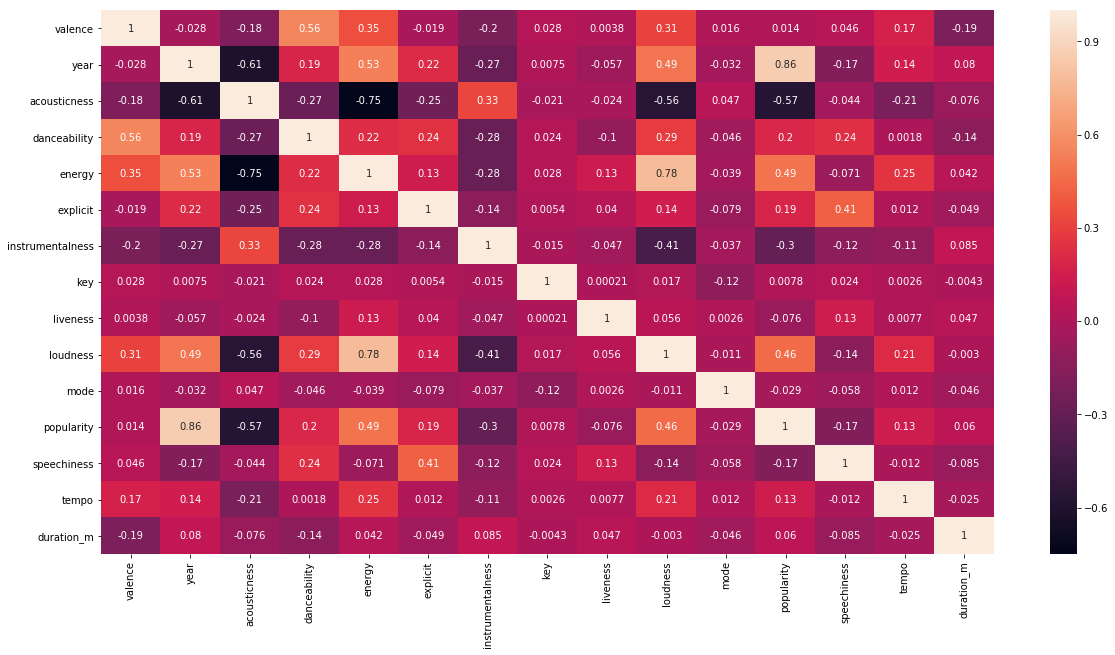

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [14]:
# X = data['']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
valence             170653 non-null float64
year                170653 non-null int64
acousticness        170653 non-null float64
artists             170653 non-null object
danceability        170653 non-null float64
energy              170653 non-null float64
explicit            170653 non-null int64
id                  170653 non-null object
instrumentalness    170653 non-null float64
key                 170653 non-null int64
liveness            170653 non-null float64
loudness            170653 non-null float64
mode                170653 non-null int64
name                170653 non-null object
popularity          170653 non-null int64
speechiness         170653 non-null float64
tempo               170653 non-null float64
duration_m          170653 non-null float64
dtypes: float64(10), int64(5), object(3)
memory usage: 23.4+ MB


In [16]:
X = data[['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
        'loudness', 'popularity', 'speechiness', 'tempo', 'duration_m']]
X = StandardScaler().fit_transform(X)

In [20]:
X

array([[-1.7828247 ,  1.27618658, -1.46701268, ..., -0.37970638,
        -1.16930675,  4.76314621],
       [ 1.65068832,  0.61134711,  1.59877887, ...,  1.94548067,
        -1.82117959, -0.399747  ],
       [-1.858821  ,  1.22034007, -1.18882049, ..., -0.3962973 ,
        -0.21240379,  2.13382382],
       ...,
       [ 0.41194856, -1.06670771,  0.5484614 , ..., -0.10749235,
        -0.81976118, -0.1559516 ],
       [-1.26756976, -1.30876246,  0.75852489, ...,  1.28798856,
        -1.36140375,  0.84205785],
       [ 0.43094764, -0.98426761,  1.80884237, ...,  0.05903135,
        -0.71220119, -0.32859144]])

In [23]:
pca = PCA(n_components=2)
pc1 = pca.fit_transform(X)

In [24]:
pc1

array([[ 3.91643678,  3.12312176],
       [ 0.34210149, -3.31478196],
       [ 3.37602051,  2.05349316],
       ...,
       [-2.85606552,  0.55134717],
       [-1.60096691,  0.77181852],
       [-2.68121252, -0.40336826]])

In [26]:
PCA_dataset1 = pd.DataFrame(data = pc1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,3.916437,3.123122
1,0.342101,-3.314782
2,3.376021,2.053493
3,1.804927,0.769693
4,1.774969,-0.044738


In [27]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

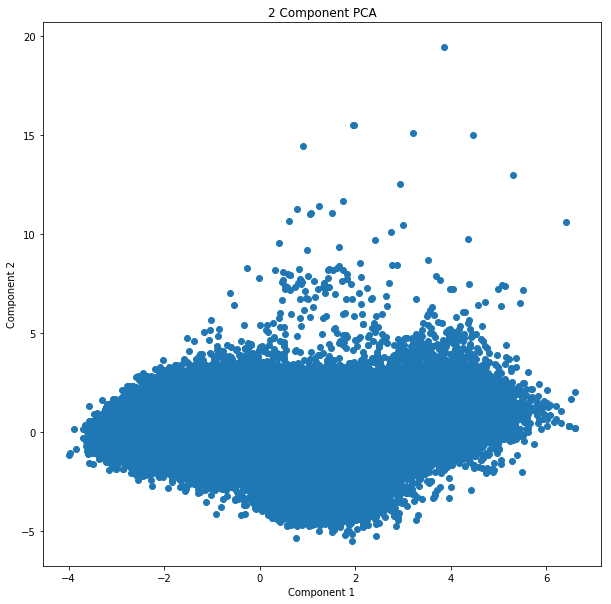

In [28]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

In [29]:
kmeans = KMeans(n_clusters = 100, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(pc1)

In [37]:
print(y_kmeans)

[14 60 46 ... 87 13 73]


In [49]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(data['key'])
Y

11

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape)

(119457, 11) (119457,)
(51196, 11)


In [57]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [58]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.13661223533088523


In [64]:
print(knn.predict([[ 0.80592454, -1.92222125,  0.82794488,  0.35855806, -0.53256765,
       -0.89521157,  0.88611011,  0.77326915, -0.32608673,  0.4862213 ,
       -0.23667187]]))
print(knn.predict([X_test[0]]))

[0]
[7]


In [65]:
genre_data = pd.read_csv('Spotify Dataset/data_by_genres.csv')

In [66]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
mode                2973 non-null int64
genres              2973 non-null object
acousticness        2973 non-null float64
danceability        2973 non-null float64
duration_ms         2973 non-null float64
energy              2973 non-null float64
instrumentalness    2973 non-null float64
liveness            2973 non-null float64
loudness            2973 non-null float64
speechiness         2973 non-null float64
tempo               2973 non-null float64
valence             2973 non-null float64
popularity          2973 non-null float64
key                 2973 non-null int64
dtypes: float64(11), int64(2), object(1)
memory usage: 325.2+ KB


In [69]:
genre_key_data = genre_data[['genres', 'key']]
genre_key_data.head()

,genres,key
0,21st century classical,6
1,432hz,5
2,8-bit,7
3,[],7
4,a cappella,7


In [74]:
def recommended_genres(key):
    ret = genre_key_data[genre_key_data['key'] == key]
    return ret

In [81]:
ret = recommended_genres(0)
print(ret['genres'])

In [82]:
genre_key_name_data = data[['key', 'name']]

In [83]:
def recommended_songs(key):
    ret = genre_key_name_data[genre_key_name_data['key'] == key]
    return ret

In [88]:
ret = recommended_songs(0)
ret.head()

,key,name
6,0,The Wearing of the Green
30,0,A Mi Palomita - Remasterizado
38,0,Je N'peux Pas Vivre Sans Amour
49,0,Yâ Râb Bu Uğursuz Gecenin Yok mu Sabahı -
63,0,Si J'avais Su


In [265]:
song_data = data[data['name'] == 'New Rules']
# song = song_data[song_data['year'] == 2011] 
song_data

,valence,year,acousticness,artists,danceability,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,duration_m
19165,0.608,2017,0.00261,['Dua Lipa'],0.762,0.7,0,2ekn2ttSfGqwhhate0LSR0,0.000016,9,0.153,-6.021,0,New Rules,80,0.0694,116.073,3.488667
169930,0.608,2017,0.00261,['Dua Lipa'],0.762,0.7,0,6tF92PMv01Ug9Dh8Rmy6nH,0.000016,9,0.153,-6.021,0,New Rules,53,0.0694,116.073,3.488667


In [103]:
print(knn.predict([[-1.2029729 , -1.19994154, -0.50185608,  0.38338544, -0.53249141,
       -0.70100542,  0.82608827,  2.22518919, -0.43992528,  0.74147069,
        0.37877759]]))
# X[17835]

[4]


In [104]:
ret = recommended_songs(4)
ret.head()

,key,name
18,4,When We Die
21,4,Mother Machree
24,4,Ney Taksimi
27,4,Korkma Sönmez
31,4,Amurado Me Dejaste - Remasterizado


In [325]:
def get_recommended_song(song):
    try:
        temp = data[data['name'] == song].index
        get_cosine_similarity(X[temp[0]])
    except:
        print('Song Not Found!!!')

In [323]:
def get_cosine_similarity(song):
    score = []
    cnt = 0
    d = {}
    init = -2
    
    for i in range(100000):
        temp = cosine_similarity([song], [X[i]])
        score.append([i, temp[0][0]])
        
    for i in range(100001, len(X)):
        temp = cosine_similarity([song], [X[i]])
        score.append([i, temp[0][0]])
        
    ret = sorted(score,key=lambda x: x[1]) 
    recom_songs = ret[-11:-1]
    
    for i in range(len(recom_songs)):
        print(f"{i+1} - {data['name'][recom_songs[i][0]]}")

In [324]:
song_name = input("Enter any song name: ")
print('Songs you might like are processing... \n')
get_recommended_song(song_name)

Enter any song name: Don't Start Now
Songs you might like are processing... 

1 - Take You Dancing
2 - We Found Love
3 - New Rules
4 - One Kiss (with Dua Lipa)
5 - Want to Want Me
6 - motive (with Doja Cat)
7 - Dynamite
8 - Really Love (feat. Craig David & Digital Farm Animals)
9 - Believer
10 - Don't Start Now


In [291]:
def get_recommended_song2(song):
    try:
        temp = data[data['name'] == song].index
        print(temp)
        get_eculidean_distance(X[temp[0]])
    except:
        print('Song Not Found!!!')

In [292]:
def get_eculidean_distance(song):
    score = []
    
    for i in range(100000):
        temp = np.linalg.norm(np.array(song)-np.array(X[i]))
        score.append([i, temp])
        
    for i in range(100001, len(X)):
        temp = np.linalg.norm(np.array(song)-np.array(X[i]))
        score.append([i, temp])
        
    ret = sorted(score,key=lambda x: x[1]) 
    recom_songs = ret[-11:-1]
    
#     print()
    
    for i in range(len(recom_songs)):
        print(f"{i+1} - {data['name'][recom_songs[i][0]]}")

In [295]:
song_name = input("Enter any song name: ")
print('Songs you might like are processing... \n')
get_recommended_song2(song_name)

Enter any song name: Just The Way You Are
Songs you might like are processing... 

Int64Index([13346, 71477, 106905, 132365], dtype='int64')
1 - Raba El Adawya Pt. 1
2 - The Psychologically Ultimate Seashore (16 rpm)
3 - Raba El Adawya Pt. 2
4 - Leilet Hob
5 - Thursday Afternoon - 2005 Digital Remaster
6 - Dopesmoker
7 - Natural White Noise for Babies - Ocean Waves for Baby Sleep
8 - Ocean Waves for Sleep
9 - Midnight Thunderstorm Part 2
10 - Brown Noise for Sleep


In [309]:
def get_recommended_song3(song):
    try:
        temp = data[data['name'] == song].index
        get_manhattan_distance(X[temp[0]])
    except:
        print('Song Not Found!!!')

In [311]:
def get_manhattan_distance(song):
    score = []
    
    for i in range(100000):
        temp = cdist([song], [X[i]], metric='cityblock')
        score.append([i, temp[0][0]])
        
    for i in range(100001, len(X)):
        temp = cdist([song], [X[i]], metric='cityblock')
        score.append([i, temp[0][0]])
        
    ret = sorted(score,key=lambda x: x[1]) 
    recom_songs = ret[-11:-1]
    
    
    for i in range(len(recom_songs)):
        print(f"{i+1} - {data['name'][recom_songs[i][0]]}")

In [315]:
song_name = input("Enter any song name: ")
print('Songs you might like are processing... \n')
get_recommended_song3(song_name)

Enter any song name: Back To You
Songs you might like are processing... 

1 - Leilet Hob
2 - Raba El Adawya Pt. 1
3 - The Psychologically Ultimate Seashore (16 rpm)
4 - Raba El Adawya Pt. 2
5 - Anslag
6 - Natural White Noise for Babies - Ocean Waves for Baby Sleep
7 - Ocean Waves for Sleep
8 - Thursday Afternoon - 2005 Digital Remaster
9 - Midnight Thunderstorm Part 2
10 - Brown Noise for Sleep
